elipse
elipse
hyperbola


<IPython.core.display.Javascript object>


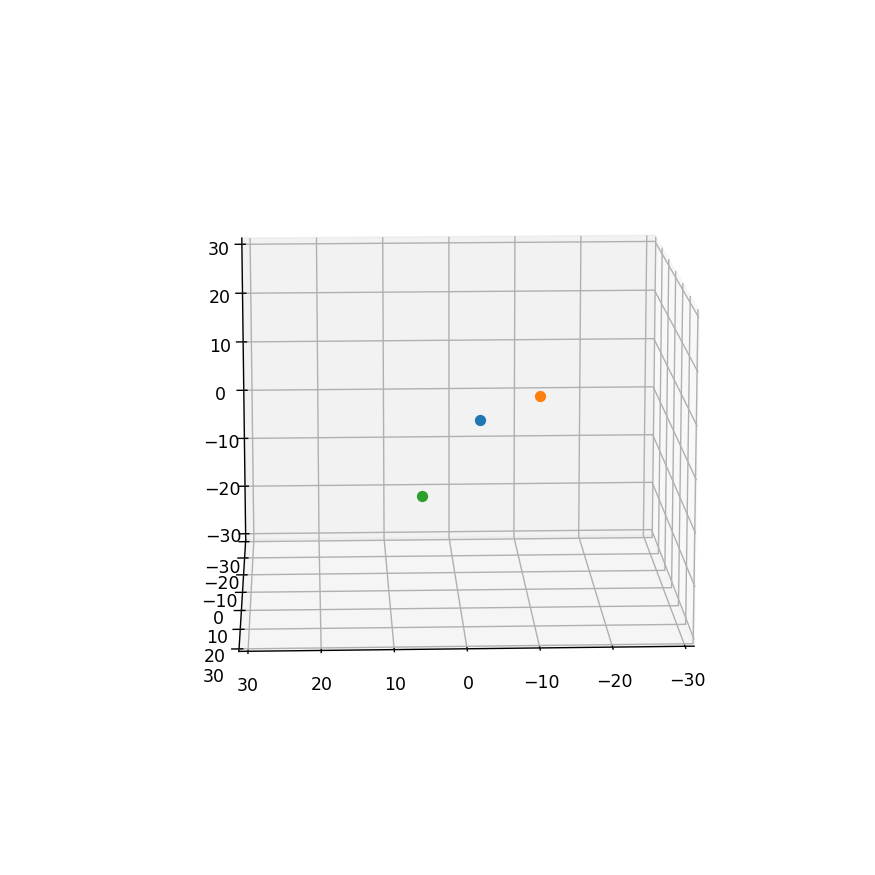

 12%|█████████▌                                                                       | 59/500 [00:11<01:25,  5.18it/s]


KeyboardInterrupt: 

In [137]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random as rnd
from tqdm import tqdm
%matplotlib notebook

dt = 0.01
G = 6

class CosmicBody:
    def __init__(self, m = 1, radius = 0., r = np.array([0., 0., 0.]),
                 v = np.array([0., 0., 0.])):
        self.m = m
        self.r = r
        self.v = v
        self.radius = radius
        
    def gravitate(self, bodies):
        dv = np.array([0., 0., 0.])
        for body in bodies:
            if (body == self):
                continue
            dr = body.r - self.r
            dv += G * body.m * dt / np.linalg.norm(dr)**3 * dr
        self.v += dv
        self.r += self.v * dt
                                     
    def orbit_type(self, bodies):
        E = self.m * np.linalg.norm(self.v)**2 / 2
        for body in bodies:
            if (np.linalg.norm(body.r  - self.r) != 0):
                E -= G * self.m * body.m / (np.linalg.norm(body.r  - self.r))
        if E > 0:
            return 'hyperbola'
        if E == 0:
            return 'parabola'
        if E < 0:
            return 'elipse'
             
class System:
    def __init__(self, bodies, t = 0):
        self.bodies = bodies
        System.t = t
    def destroy(self):
        for body1 in self.bodies:
            for body2 in self.bodies:
                if (body1 == body2):
                    continue
                if np.linalg.norm(body1.r - body2.r) < (body1.radius + body2.radius):
                    self.bodies.remove(body1)
                    self.bodies.remove(body2)
    def step(self):
        self.destroy()
        for body in self.bodies:
            body.gravitate(self.bodies)
    def show(self):
        fig = plt.figure(figsize=(7, 7))
        ax = fig.add_subplot(111, projection='3d')
        p = 4
        for t in tqdm(np.arange(0., 5, dt)):
            p += 0.01
            angle = 60 + 60 * p / 10
            ax.clear()
            ax.axes.set_xlim3d(-30, 30)
            ax.axes.set_ylim3d(-30, 30)
            ax.axes.set_zlim3d(-30, 30)
            for body in self.bodies:
                ax.scatter(body.r[0], body.r[1], body.r[2], s=30)
            ax.view_init(30 - angle * 0.2, angle)
            fig.canvas.draw()
            self.step()
        
                
if __name__ == '__main__':
    star = CosmicBody(8000.,1,np.array([0.,0.,0.]),np.array([0.,0.,0.]))
    body1 = CosmicBody(100., 1,np.array([-10.,15.,-10.]),np.array([20.,-3.,-5.]))
    body2 = CosmicBody(1000.,1,np.array([10.,-9.,15.]),np.array([-55.,8.,-12.]))
    body3 = CosmicBody(10.,1,np.array([15.,9.,-15.]),np.array([-32.,-5.,1200.]))
    s =[star,body1, body2, body3]
    print(body1.orbit_type(s))
    print(body2.orbit_type(s))
    print(body3.orbit_type(s))
    System(s).show()
    